# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [1]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df = pd.read_csv("Boston.csv") # load the dataset

In [3]:
df.head() # read first five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#### Observations:

- The DataFrame has 13 columns as mentioned in the Attribute Information. 
- Data in each row corresponds to a house in Boston suburb or town.
- **MEDV** is the target variable, which will be predicted with the model.

In [4]:
df.tail() # read last five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [5]:
# Find the dimensions of the dataframe
df.shape

(506, 13)

Observations:
Tha DataFrame has 506 rows and 13 columns.

## Data Overview

- Observations
- Sanity checks

In [6]:
# check the info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


#### Observations:
- There are a total of 506 non-null observations in each of the columns.
- There are 13 columns in the dataset.
- There are two datatypes (both of numerical data type) of the different columns in the given DataFrame: 
- float64("CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "PTRATIO", "LSTAT", "MEDV"), 
- int64("CHAS", "RAD", "TAX")


In [7]:
# Find the number of missing values in each column
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# check duplicate entries in the data
df.duplicated().sum()

0

#### Observations:
There are no any missing values in the data.

In [9]:
#calculate descriptive statistics for all neumeric columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # round numbers in the table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.39,0.45,0.54,0.62,0.87
RM,506.00,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.00,408.24,168.54,187.00,279.00,330.00,666.00,711.00


#### Observations:
**CRIM** ranges from 0.01 to 88.98 with average about 3.61 per capita crime rate.
About 50% of the houses are located in the towns with very low crime rates.

**ZN**: About 50% of the houses are located in the towns where there are no residential lands zoned for lots over 25,000 sq.ft.

**CHAS**: Small proportion of houses bound Charles River.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

### Univariate Analysis

                                    Histplot CRIM


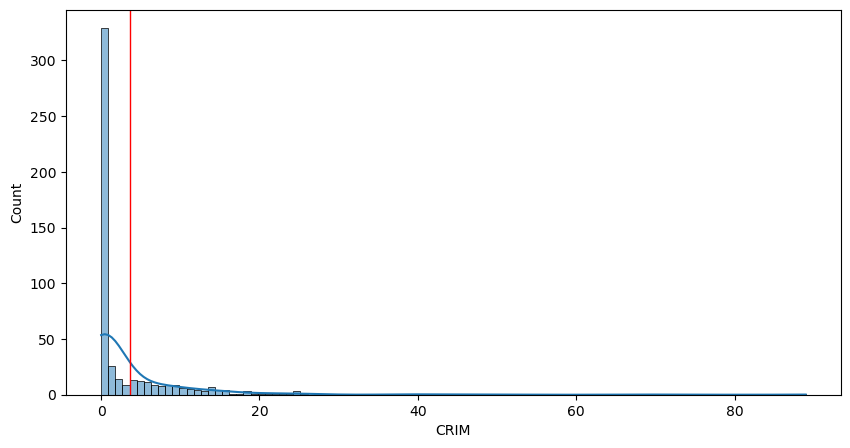

                                    Histplot ZN


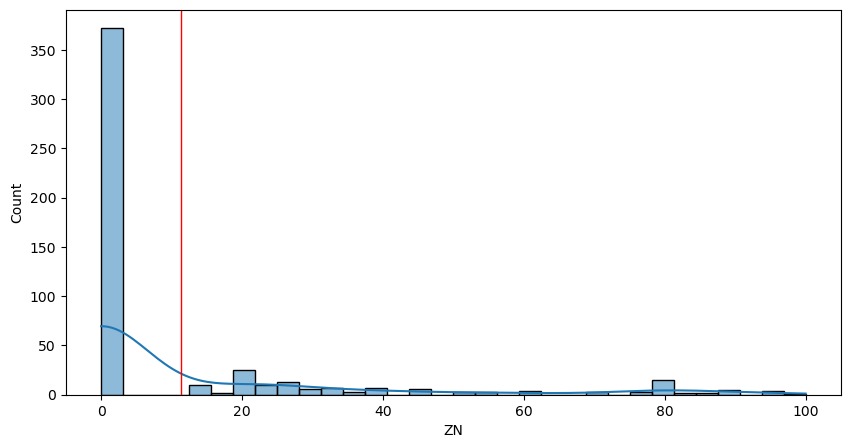

                                    Histplot INDUS


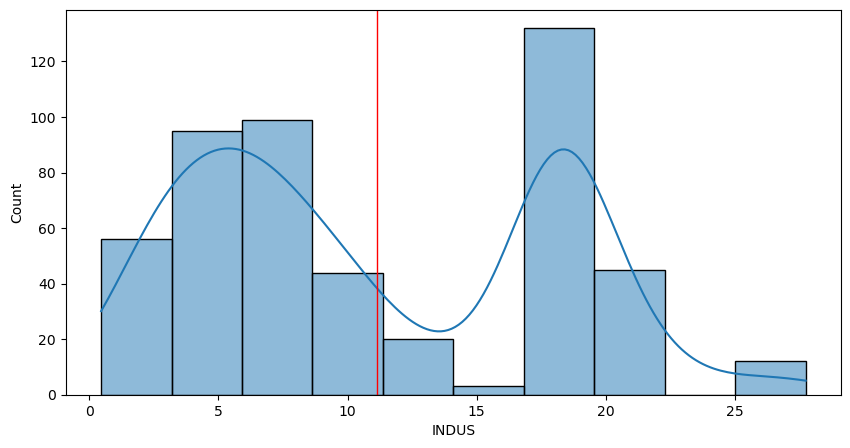

                                    Histplot CHAS


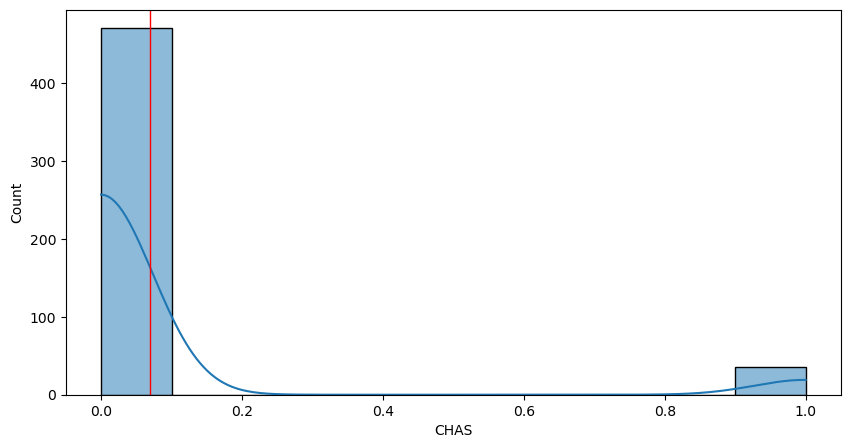

                                    Histplot NOX


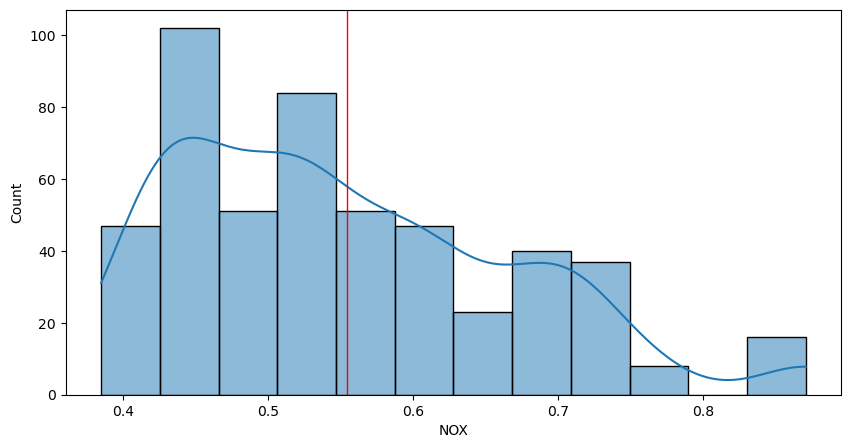

                                    Histplot RM


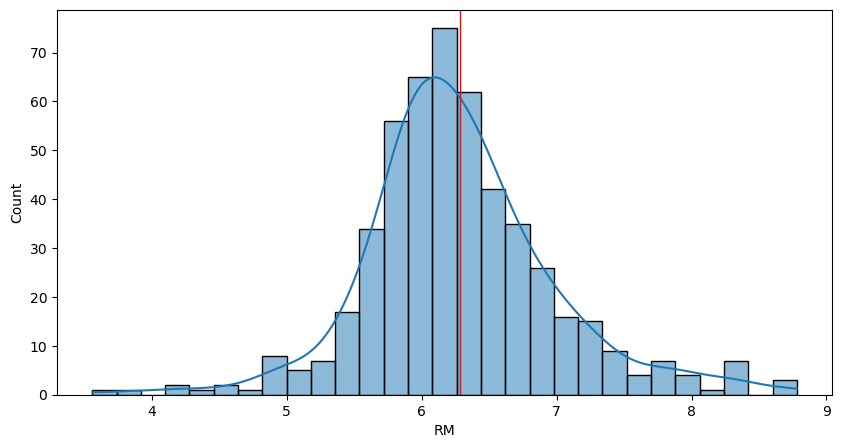

                                    Histplot AGE


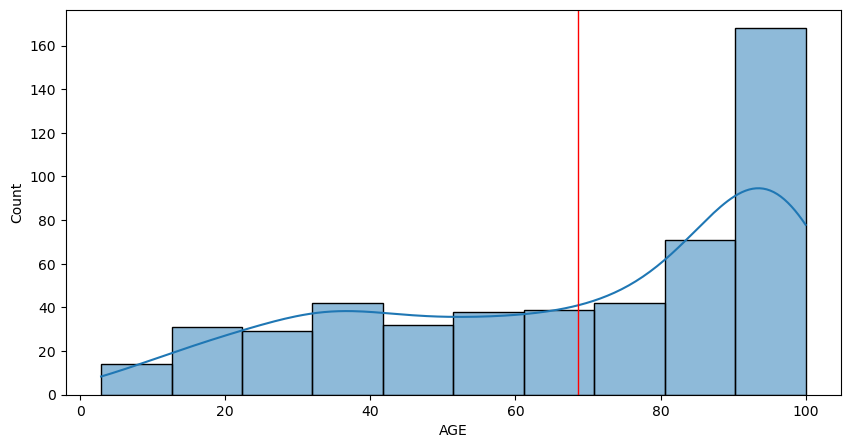

                                    Histplot DIS


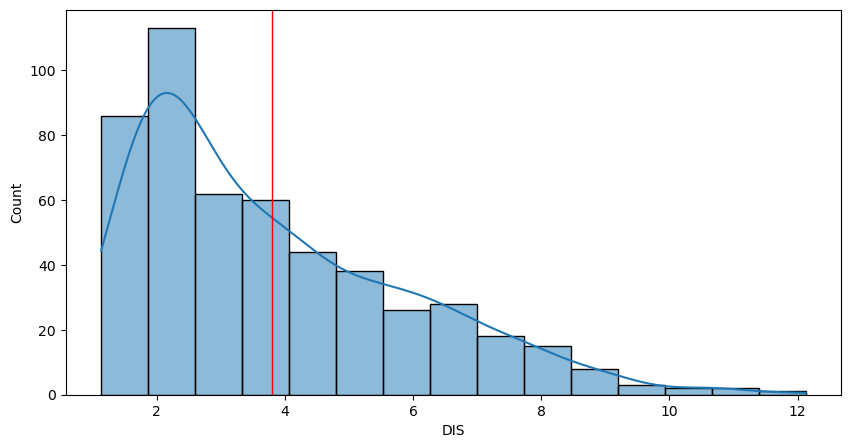

                                    Histplot RAD


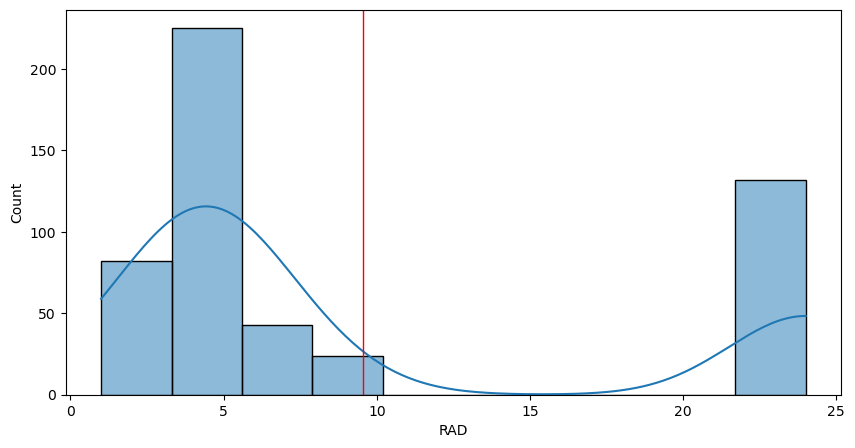

                                    Histplot TAX


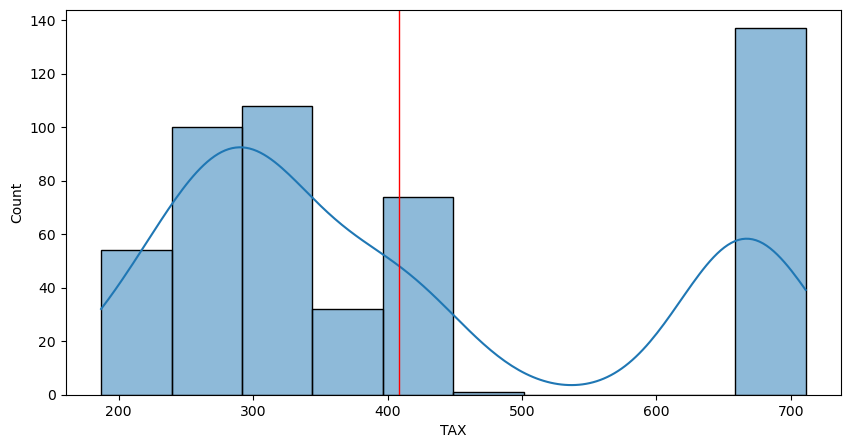

                                    Histplot PTRATIO


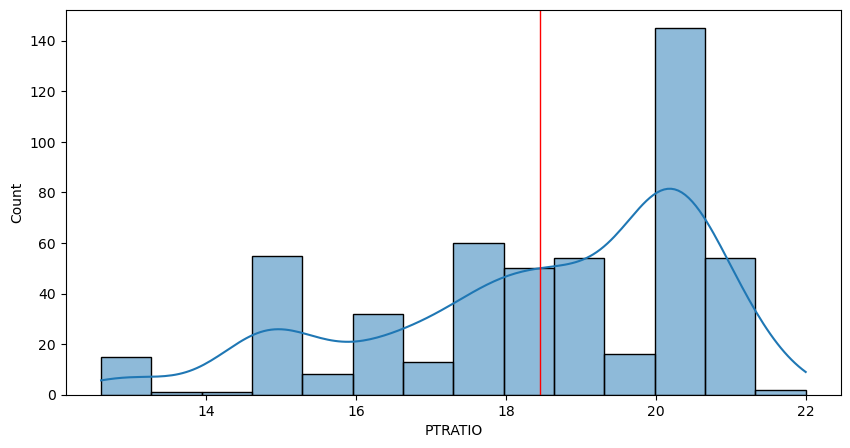

                                    Histplot LSTAT


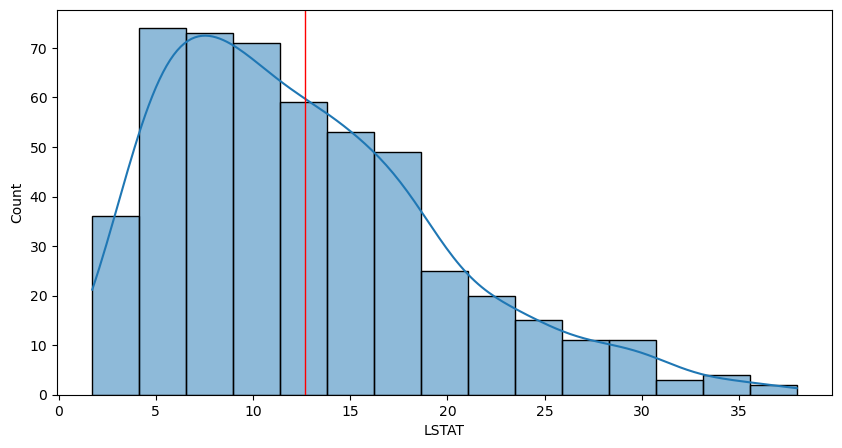

                                    Histplot MEDV


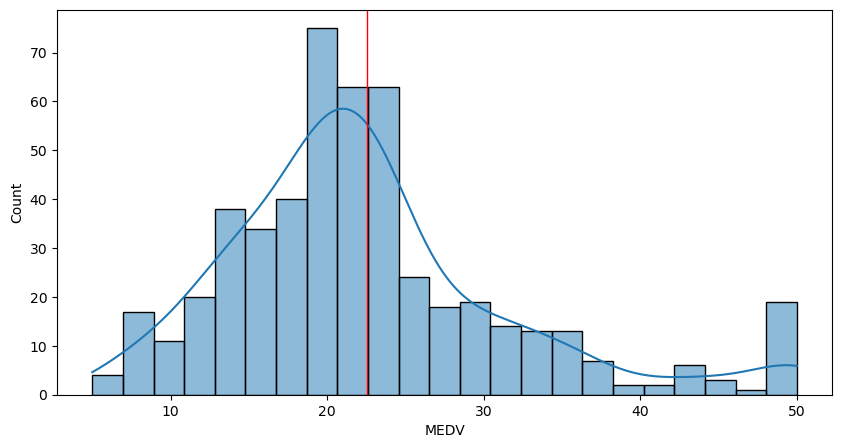

In [10]:
 # Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (10, 5))
    sns.histplot(data = df, x = i, kde = True)
    plt.axvline(df[i].mean(), color='r', linewidth=1) # add red vertical line for mean
    plt.title(print("                                    Histplot", i))
    plt.show()

#### Observations:
**CRIM** and **ZN** both have positive skew. We can say that most of the houses are located in the areas with lower crime rates and most residential land zoned under the area of 25,000 sq. ft.

Since **CHAS** is a dummy variable with only two values 0 and 1, the distribution is bimodal, and the majority of houses are located not close to Charles River.

**AGE** histogram demonstrates that many of the houses were built before 1940.

**DIS** histogram demonstrates that the majority of houses are close to five Boston employement centers.

**RAD** and **TAX** both have bimodal distribution. It would be interesting to analyze them further.

**MEDV** histogram is slightly skewed, so it will probably need a log transformation.

Text(0, 0.5, 'Number of Houses')

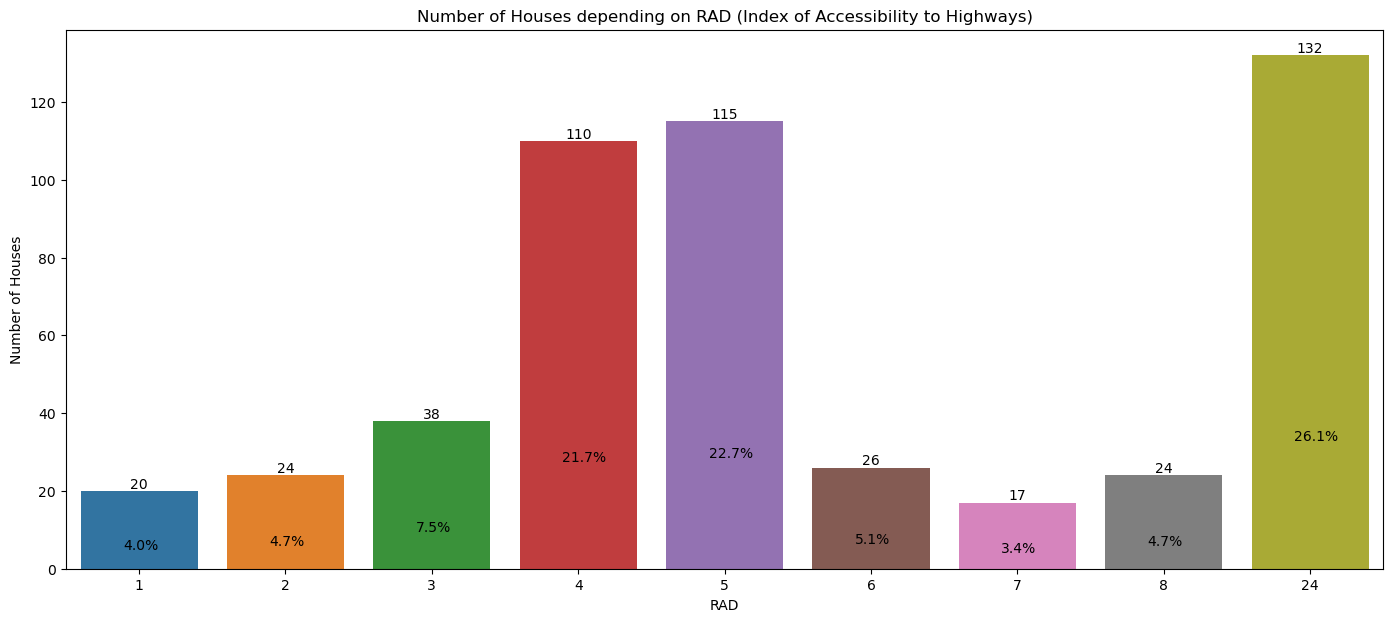

In [11]:
plt.figure(figsize = (17, 7))

rad_plot = sns.countplot(df['RAD'])
for label in rad_plot.containers:
    rad_plot.bar_label(label) # Add labeles to each container

# Add percentage labels:     
for p in rad_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/506)
    x = p.get_x() + p.get_width() - 0.51
    y = p.get_y() + p.get_height()/4
    rad_plot.annotate(percentage, (x, y))
# Add the graph title and axes labels
plt.title('Number of Houses depending on RAD (Index of Accessibility to Highways)')
plt.xlabel('RAD')
plt.ylabel('Number of Houses')

Text(0, 0.5, 'Number of Houses')

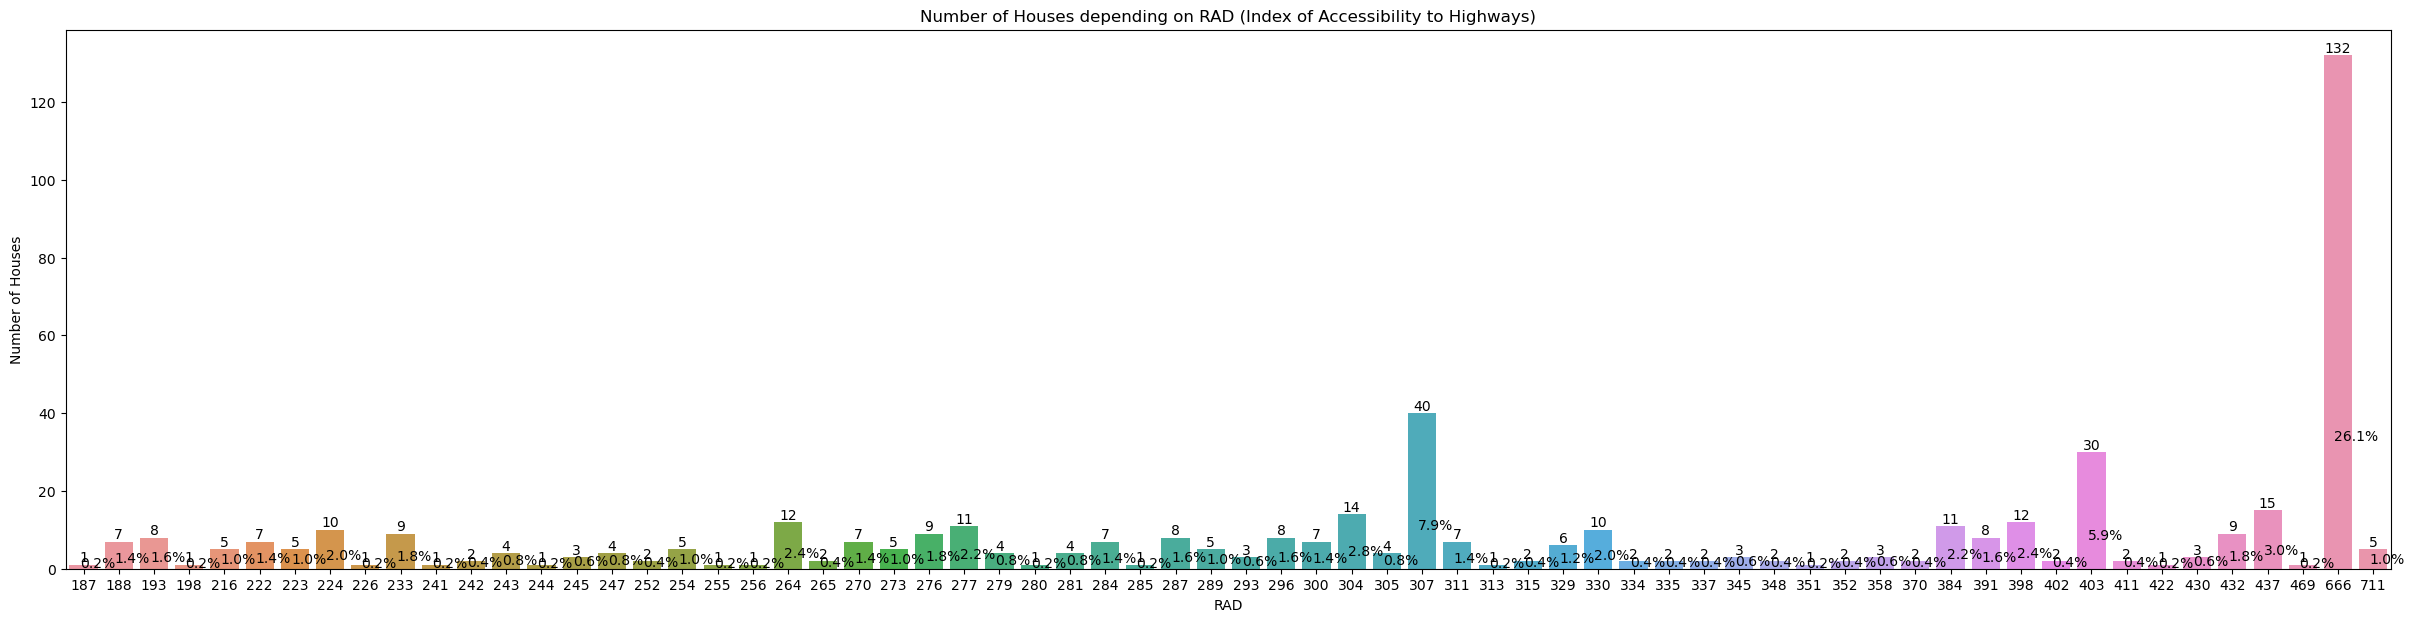

In [12]:
plt.figure(figsize = (30, 7))

tax_plot = sns.countplot(df['TAX'])
for label in tax_plot.containers:
    tax_plot.bar_label(label) # Add labeles to each container

# Add percentage labels:     
for p in tax_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/506)
    x = p.get_x() + p.get_width() - 0.51
    y = p.get_y() + p.get_height()/4
    tax_plot.annotate(percentage, (x, y))
# Add the graph title and axes labels
plt.title('Number of Houses depending on RAD (Index of Accessibility to Highways)')
plt.xlabel('RAD')
plt.ylabel('Number of Houses')

#### Observations:
132 houses which have **RAD = 24** have the highest **TAX**. This needs more detailed analysis to understand the connection.

Text(0, 0.5, 'Number of Houses')

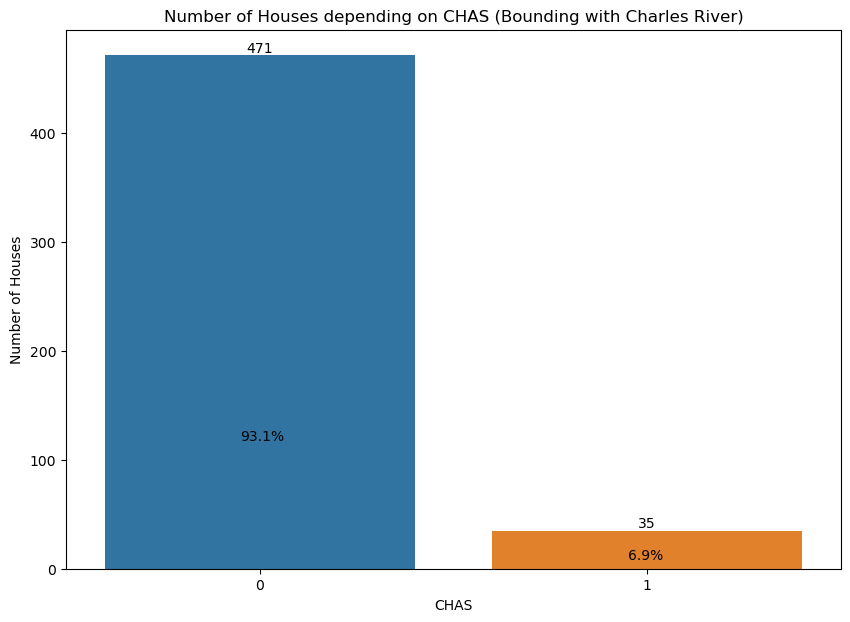

In [13]:
plt.figure(figsize = (10, 7))

chas_plot = sns.countplot(df['CHAS'])
for label in chas_plot.containers:
    chas_plot.bar_label(label) # Add labeles to each container

# Add percentage labels:     
for p in chas_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/506)
    x = p.get_x() + p.get_width() - 0.45
    y = p.get_y() + p.get_height()/4
    chas_plot.annotate(percentage, (x, y))
# Add the graph title and axes labels
plt.title('Number of Houses depending on CHAS (Bounding with Charles River)')
plt.xlabel('CHAS')
plt.ylabel('Number of Houses')

#### Observations:
93.1% of houses do not bound with Charles River

## **Bivariate Analysis**

### **Correlation Heatmap**

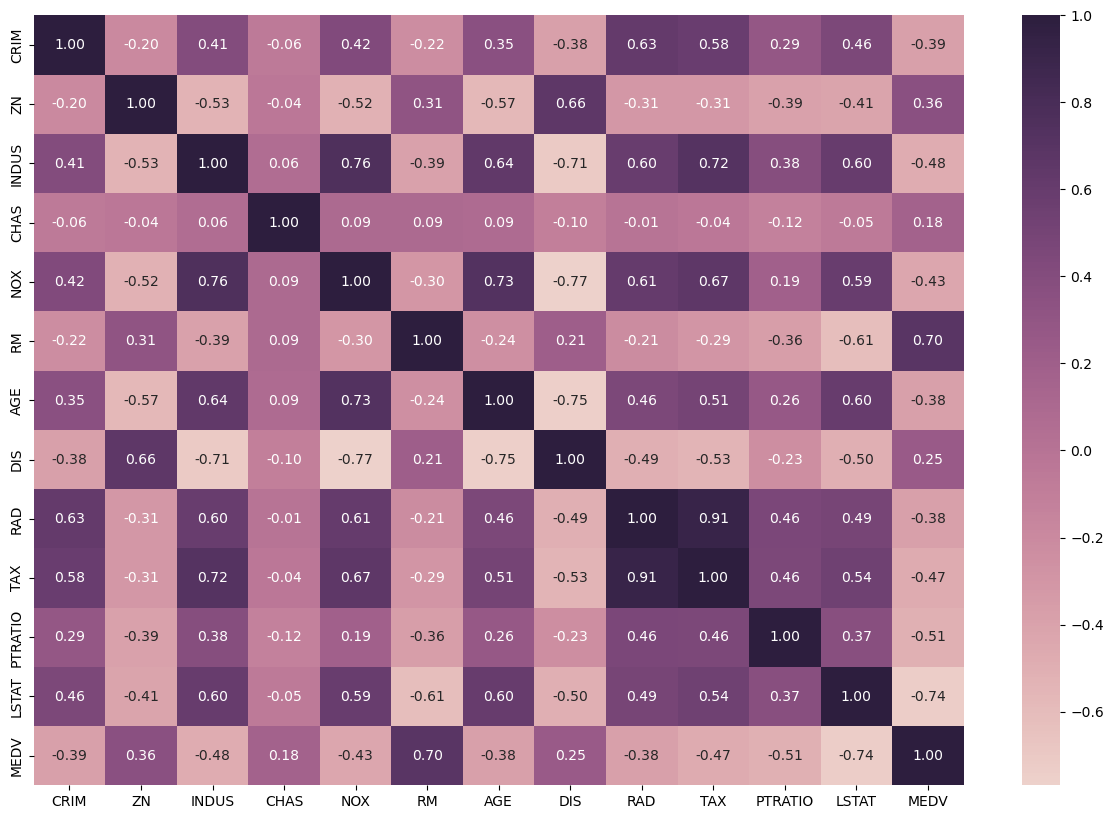

In [14]:
# The correlation heatmap 
plt.figure(figsize = (15, 10))
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)
plt.show() # Display the plot

**Observation:**

- Interestingly high correlation between **TAX** and **RAD**.
- **MEDV** has a good positive correlation with **RM** only (+0.7). (Bigger the average number of rooms - higher the MEDV)
- **MEDV** has a negative correlation with **LSTAT** (-0.74)

The features that have significant correlations (>= 0.7 or <= -0.7) are the following:
- RAD vs TAX (+0.91)
- INDUS vs NOX (+0.76)
- AGE vs NOX (+0.73)
- INDUS vs TAX (+0.72)
- MEDV vs RM (+0.70)
- INDUS vs DIS (-0.71)
- LSTAT vs MEDV (-0.74)
- AGE vs DIS (-0.75)
- DIS vs NOX (-0.77)




### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

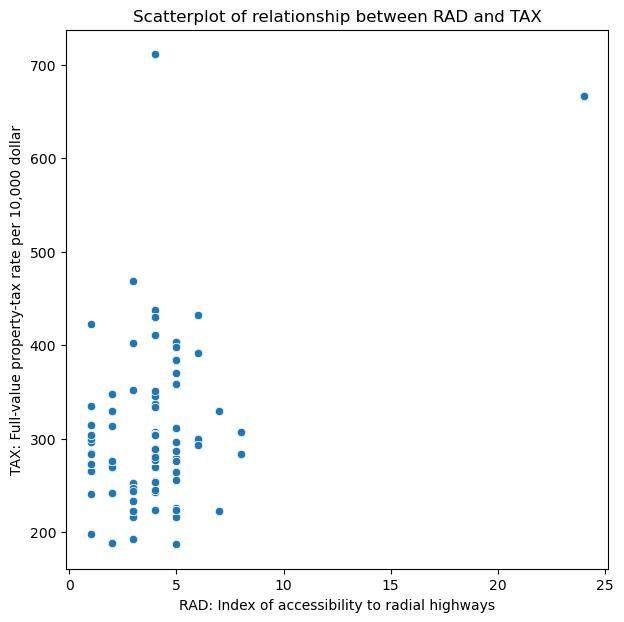

In [15]:
# Scatterplot to visualize the relationship between RAD and TAX
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.xlabel("RAD: Index of accessibility to radial highways")

plt.ylabel("TAX: Full-value property-tax rate per 10,000 dollar")

plt.title("Scatterplot of relationship between RAD and TAX")

plt.show()

**Observations:**

- The correlation between RAD and TAX is the highest (+0.91), but there is no trend.
- Few outliers are spotted on the scatterplot.

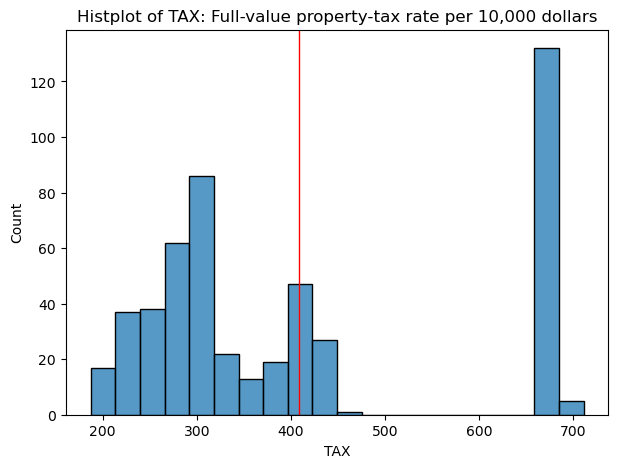

In [16]:
# TAX Histplot
plt.figure(figsize = (7,5))
sns.histplot(df['TAX'], bins = 20)
plt.axvline(df['TAX'].mean(), color='r', linewidth=1) # add red vertical line for mean

# Add the graph title and axes labels
plt.title('Histplot of TAX: Full-value property-tax rate per 10,000 dollars')
plt.xlabel('TAX')

# Display the plot
plt.show()

**Observations:**

- The TAX distribution has bimodal distribution.

In [17]:
# Remove the data corresponding to high tax rate (removing "outliers")
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The new correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The new correlation between TAX and RAD is 0.24975731331429196


**Observations:**

- The observed high correlation between TAX and RAD was because of the "outliers."

Scatterplot of relationship between INDUS and NOX, r =  0.7636514469209161


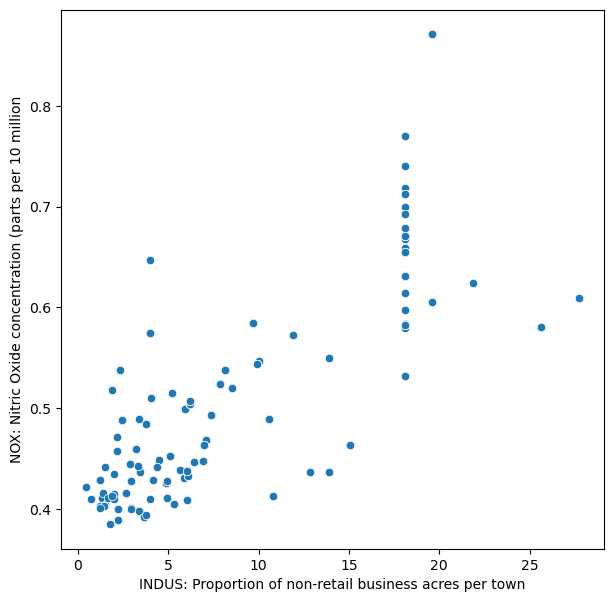

In [18]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.xlabel("INDUS: Proportion of non-retail business acres per town")

plt.ylabel("NOX: Nitric Oxide concentration (parts per 10 million")

plt.title(print("Scatterplot of relationship between INDUS and NOX, r = ", pearsonr(df['INDUS'], df['NOX'])[0]))

plt.show()

**Observations:**

- The Nitric Oxide concentration (parts per 10 million) seems to increase as the value of INDUS (Proportion of non-retail business acres per town) increases. 

Scatterplot of relationship between AGE and NOX, r =  0.7314701037859594


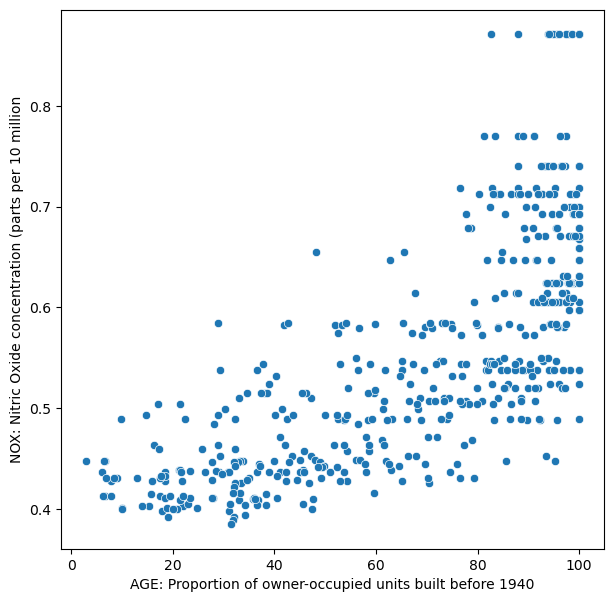

In [19]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.xlabel("AGE: Proportion of owner-occupied units built before 1940")

plt.ylabel("NOX: Nitric Oxide concentration (parts per 10 million")

plt.title(print("Scatterplot of relationship between AGE and NOX, r = ", pearsonr(df['AGE'], df['NOX'])[0]))

plt.show()

**Observations:**

- The Nitric Oxide concentration (parts per 10 million) seems to slightly increase as the value of AGE increases. 

- There are a few outliers in a vertical line as the AGE value seems to be capped at 100.

Scatterplot of relationship between INDUS and TAX, r =  0.720760179951542


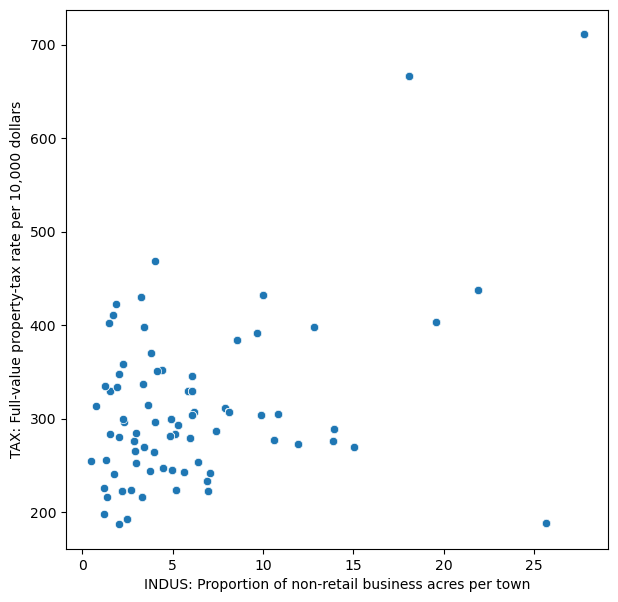

In [20]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.xlabel("INDUS: Proportion of non-retail business acres per town")

plt.ylabel("TAX: Full-value property-tax rate per 10,000 dollars")

plt.title(print("Scatterplot of relationship between INDUS and TAX, r = ", pearsonr(df['INDUS'], df['TAX'])[0]))

plt.show()

**Observations:**

- The tax rate increases with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

Scatterplot of relationship between RM and MEDV, r =  0.6953599470715388


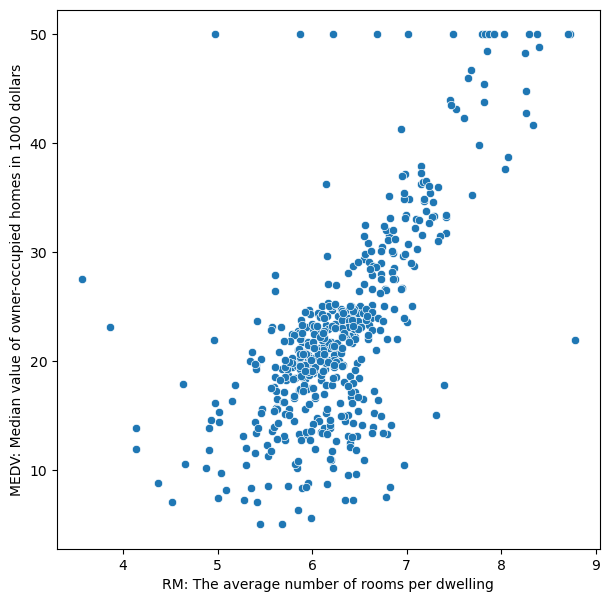

In [21]:
# Scatterplot to visualize the relationship between MEDV and RM
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.xlabel("RM: The average number of rooms per dwelling")

plt.ylabel("MEDV: Median value of owner-occupied homes in 1000 dollars")

plt.title(print("Scatterplot of relationship between RM and MEDV, r = ", pearsonr(df['MEDV'], df['RM'])[0]))

plt.show()

**Observations:**

- The Median value of owner-occupied homes increases as the average number of rooms increases. 

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

Scatterplot of relationship between INDUS and DIS, r =  -0.7080269887427684


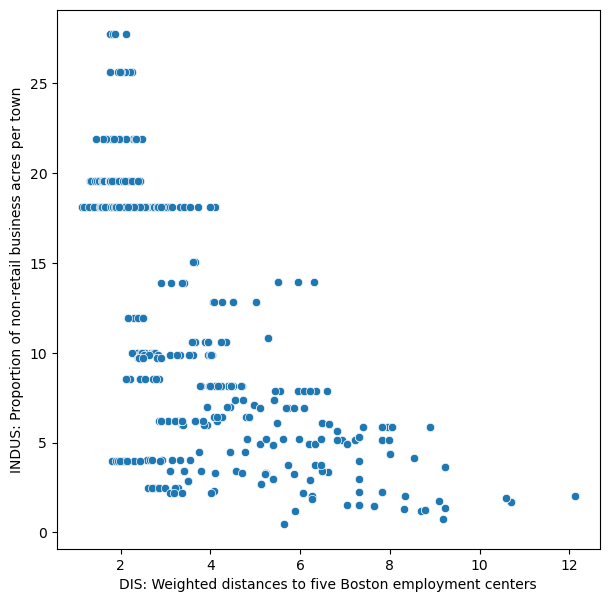

In [22]:
# Scatterplot to visualize the relationship between DIS and INDUS
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'DIS', y = 'INDUS', data = df)

plt.xlabel("DIS: Weighted distances to five Boston employment centers")

plt.ylabel("INDUS: Proportion of non-retail business acres per town")

plt.title(print("Scatterplot of relationship between INDUS and DIS, r = ", pearsonr(df['INDUS'], df['DIS'])[0]))

plt.show()

**Observations:**

- The Proportion of non-retail business acres per town decreases as the Weighted distances to five Boston employment centers increases. 

Scatterplot of relationship between LSTAT and MEDV, r =  -0.7376627261740146


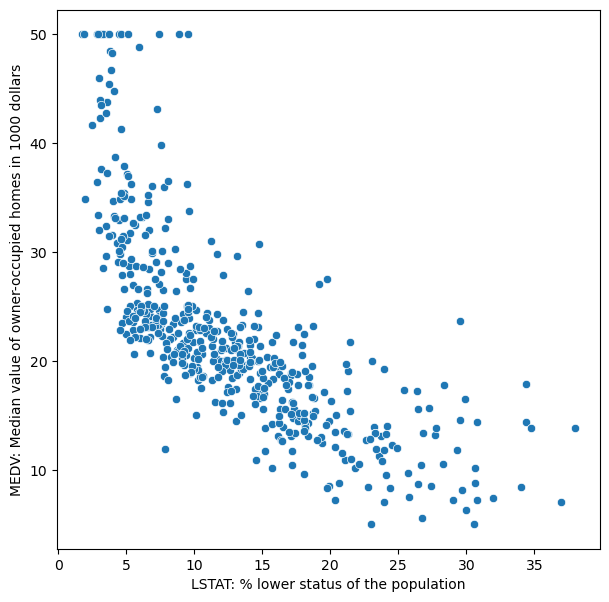

In [23]:
# Scatterplot to visualize the relationship between LSTAT and MEDV
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.xlabel("LSTAT: % lower status of the population")

plt.ylabel("MEDV: Median value of owner-occupied homes in 1000 dollars")

plt.title(print("Scatterplot of relationship between LSTAT and MEDV, r = ", pearsonr(df['LSTAT'], df['MEDV'])[0]))

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in % lower status of the population. 
- This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

Scatterplot of relationship between DIS and AGE, r =  -0.7478805408686322


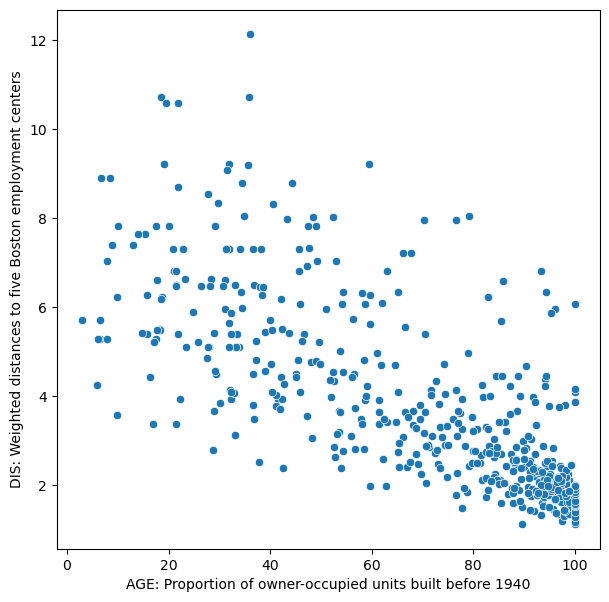

In [24]:
# Scatterplot to visualize the relationship between DIS and AGE
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.xlabel("AGE: Proportion of owner-occupied units built before 1940")

plt.ylabel("DIS: Weighted distances to five Boston employment centers")

plt.title(print("Scatterplot of relationship between DIS and AGE, r = ", pearsonr(df['DIS'], df['AGE'])[0]))

plt.show()

**Observations:**

- The higher the Proportion of owner-occupied units built before 1940, the shorter is Weighted distances to five Boston employment centers. 
- There are few outliers as the AGE values seem to be capped at 100.

Scatterplot of relationship between DIS and NOX, r =  -0.769230113225829


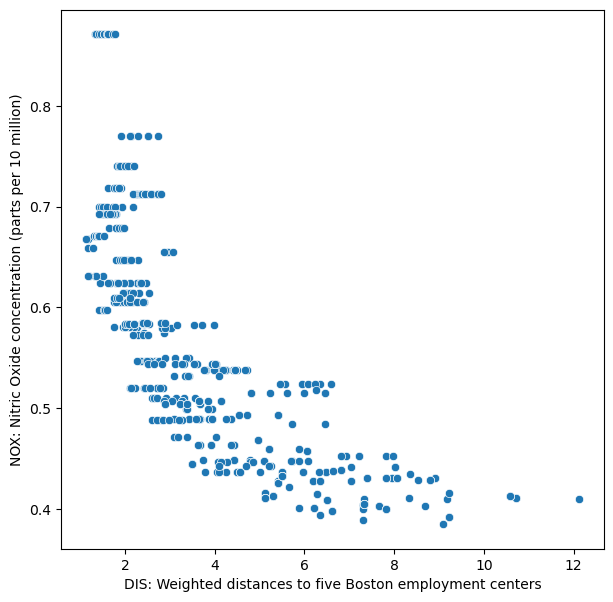

In [25]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.xlabel("DIS: Weighted distances to five Boston employment centers")

plt.ylabel("NOX: Nitric Oxide concentration (parts per 10 million)")

plt.title(print("Scatterplot of relationship between DIS and NOX, r = ", pearsonr(df['DIS'], df['NOX'])[0]))


plt.show()

**Observations:**

- The longer the Weighted distances to five Boston employment centers, the lower is the Nitric Oxide concentration (parts per 10 million).

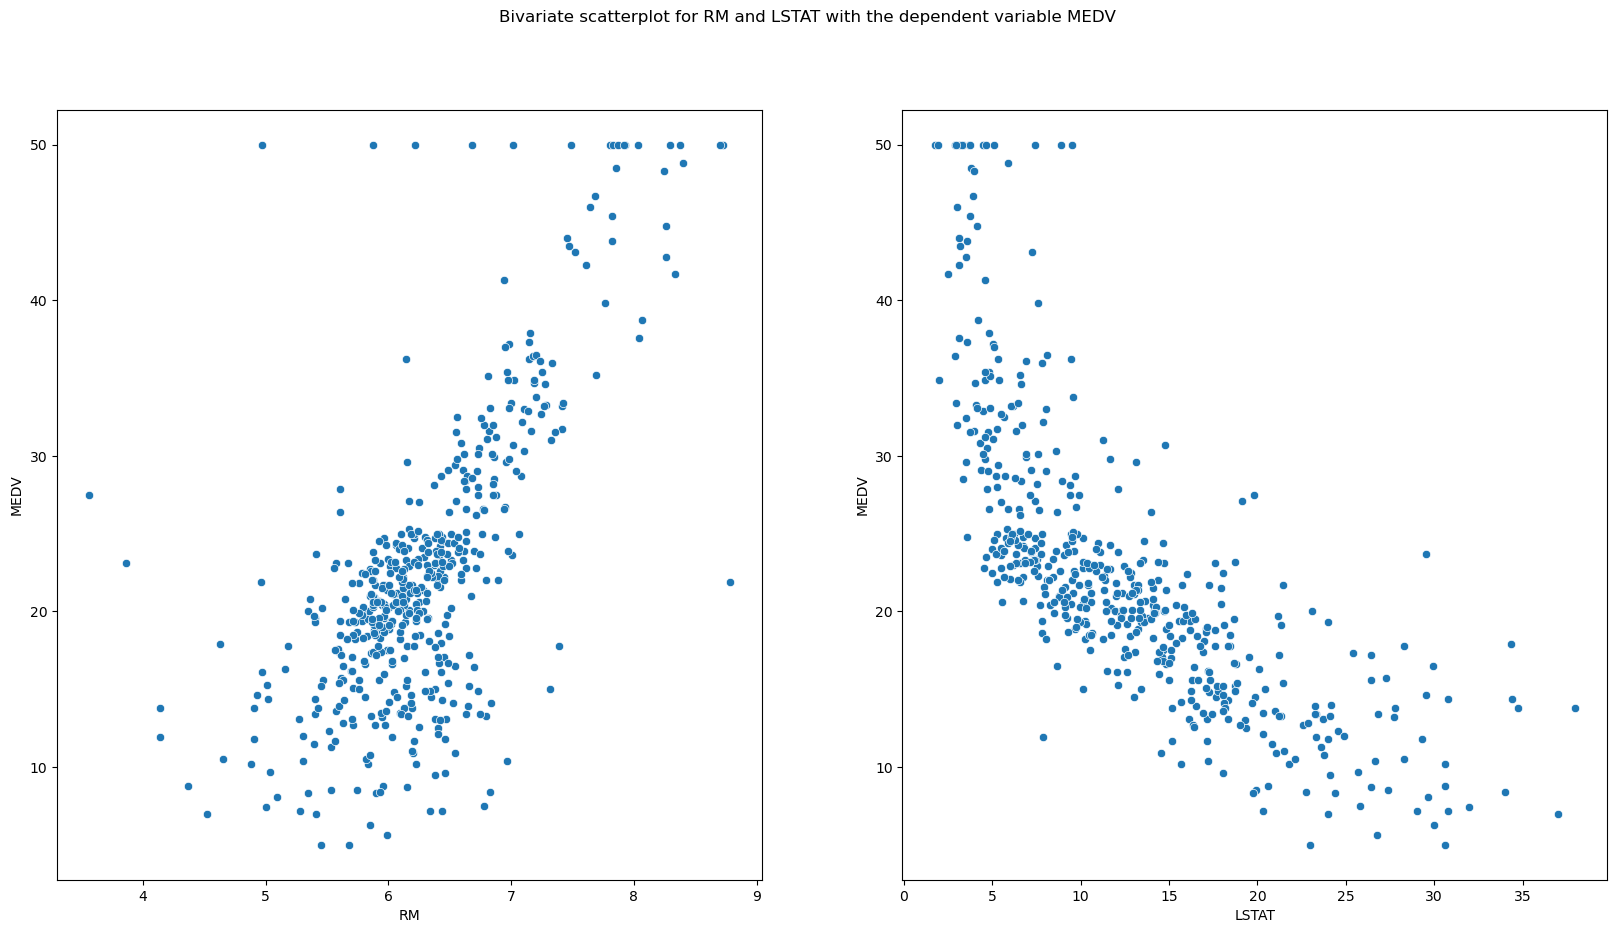

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

hue = None
  
fig.suptitle('Bivariate scatterplot for RM and LSTAT with the dependent variable MEDV')

sns.scatterplot(x = 'RM', y = 'MEDV', data = df, ax = axes[0]);

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df, ax = axes[1]);

**Observations:**

- From the first scatter plot between the variables **RM** and **MEDV**, it is clear that there is a positive correlation between them. The Median value of owner-occupied homes increases as the average number of rooms increases. There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

- From the second scatter plot between the variables **LSTAT** and **MEDV**, it is clear that there is a negative correlation between them.
- There are a few outliers in a horizontal line as the **MEDV** value seems to be capped at 50.
- The price of the house tends to decrease with an increase in % lower status of the population. 
- This is also possible as the house price is lower in areas where lower status people live.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [27]:
df['MEDV_log'] = np.log(df['MEDV']) # Log transformation of dependent variable as they are skewed

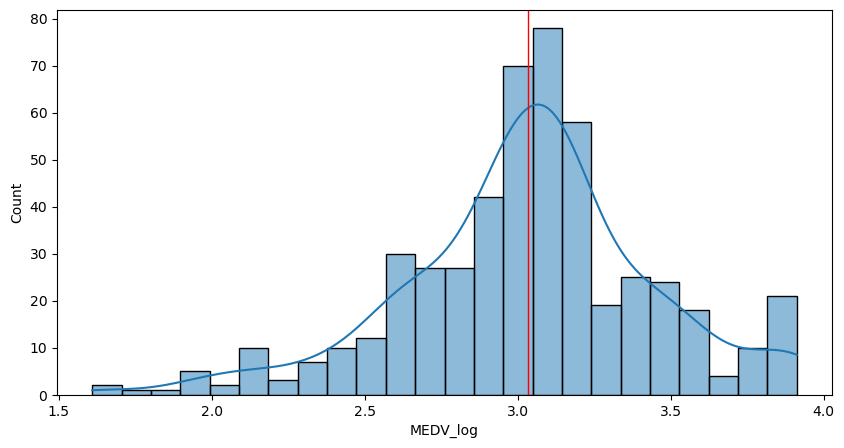

In [28]:
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'MEDV_log', kde = True)
plt.axvline(df['MEDV_log'].mean(), color='r', linewidth=1) # add red vertical line for mean

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew** now.

In [29]:
# Separate the dependent variable and indepedent variables
# We are extracting the outcome variable separately
Y = df['MEDV_log']

# We are removing the target variable from the feature set
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Adding the intercept term
X = sm.add_constant(X)

In [30]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [31]:
#Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

print(checking_vif(X_train))

    feature    VIF
0     const 535.37
1      CRIM   1.92
2        ZN   2.74
3     INDUS   4.00
4      CHAS   1.08
5       NOX   4.40
6        RM   1.86
7       AGE   3.15
8       DIS   4.36
9       RAD   8.35
10      TAX  10.19
11  PTRATIO   1.94
12    LSTAT   2.86


TAX has a highest VIF score. Therefore, we are dropping TAX and building the model.

In [32]:
# Create the model after dropping TAX
X_train = X_train.drop(columns = 'TAX')

# Check for updated VIF
print(checking_vif(X_train))

    feature    VIF
0     const 532.03
1      CRIM   1.92
2        ZN   2.48
3     INDUS   3.27
4      CHAS   1.05
5       NOX   4.36
6        RM   1.86
7       AGE   3.15
8       DIS   4.33
9       RAD   2.94
10  PTRATIO   1.91
11    LSTAT   2.86


## Model Building - Linear Regression

In [33]:
# Create the model
model1 = sm.OLS(Y_train, X_train).fit()

# Get the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          1.40e-101
Time:                        17:55:42   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

**Observations:**

- We can see that the **R-squared** for the model is **0.769**. 
- Not all variables are statistically significant to predict the outcome variable. To check which variables are statistically significant or have predictive power to predict the target variable, we need to check the **p-value** against all the independent variables. **ZN**, **INDUS**, and **AGE** variables have high p-values, so they are not statistically significant, and we will eliminate them.

**Interpreting the Regression Results:**

1. **Adj. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adjusted R-squared is **0.761**.

2. **coeff**: It represents the change in the output Y due to a change of one unit in the independent variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P >|t|**: It is the p-value.
   
   * Pr(>|t|) : For each independent feature, there is a null hypothesis and alternate hypothesis.

    Ho : Independent feature is not significant. 
   
    Ha : Independent feature is significant. 
    
   * The p-value of less than 0.05 is considered to be statistically significant with a confidence level of 95%. 

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [34]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from DataFrame
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'})

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(Y_train, X_train).fit()

# Get the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          2.61e-104
Time:                        17:55:42   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

**Observations:**
- The R-squared value has decreased by 0.002, as we have removed three variables from the model, whereas the adjusted R-squared value has increased by 0.001, because we removed statistically insignificant variables only.

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied:
1. Mean of residuals should be 0
2. No heteroscedasticity
3. Linearity of variables
4. Normality of error terms

**Mean of residuals should be zero.**

In [35]:
residuals = model2.resid
print(residuals)

13     0.03
61    -0.13
377   -0.16
39     0.07
365    0.34
       ... 
255   -0.08
72    -0.15
396   -0.26
235   -0.03
37    -0.10
Length: 354, dtype: float64


In [36]:
residuals.mean()

-5.5837318447531885e-15

The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

**Should be no heteroscedasticity**

Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [37]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(Y_train, X_train)

lzip(name, test)

[('F statistic', 1.0835082923425283), ('p-value', 0.3019012006766869)]

As we observe from the above test, the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means the residuals are homoscedastic.

**Linearity of Variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

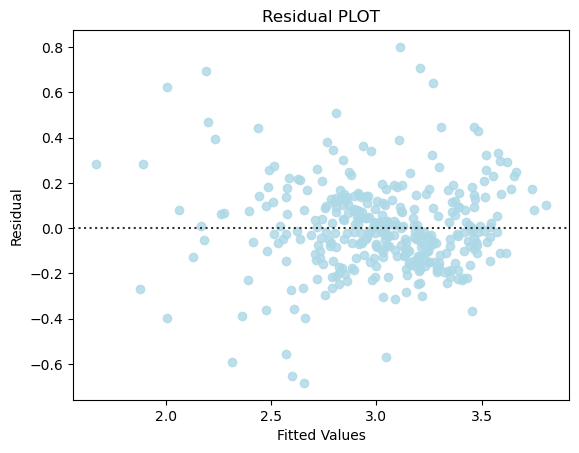

In [38]:
# Predicted values
fitted = model2.fittedvalues

sns.residplot(x = fitted, y = residuals, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

We can see that there is no pattern in the residuals vs fitted values scatter plot.

**Tests for Normality**

The residuals should be normally distributed.

<AxesSubplot:ylabel='Count'>

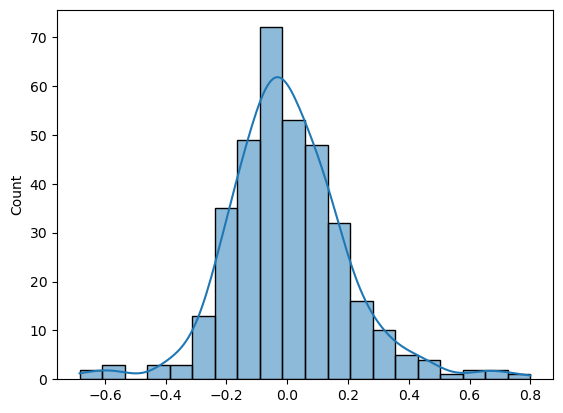

In [39]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True, bins = 20)

We can see that the error terms are normally distributed. The assumption of normality is satisfied.

In [40]:
from scipy.stats import shapiro

In [41]:
shapiro(residuals)

ShapiroResult(statistic=0.9635363221168518, pvalue=1.0045714304851572e-07)

As it can be seen, the p-value is significant and the residuals are not normally distributed according to the Shapiro-Wilk test. Notice however that the test warns about the accuracy of the p-value (the statistics is accurate however and the p-value is quite small nevertheless)

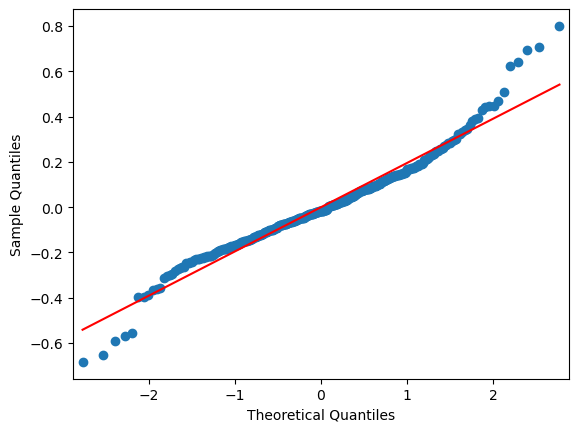

In [42]:
# Plot q-q plot of residuals
sm.qqplot(residuals, line = 's');

We see some departures from the normal distribution at the right tail of the distribution

In [43]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          2.61e-104
Time:                        17:55:43   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

We have verified all the assumptions of the linear regression model. The final equation of the model is as follows:

**MEDV_log = 4.6494 - 0.0125 $*CRIM$ + 0.1198 $*CHAS$ - 1.0562$*NOX$ + 0.0589$*RM$ - 0.0441$*DIS$ + 0.0078$*RAD$ - 0.0485$*PTRATIO$ - 0.0293$*LSTAT$**

## **Evaluation Metrics**

### **R-Squared**

The R-squared metric gives us an indication that how good/bad our model is from a baseline model. Here, we have explained ~98% variance in the data as compared to the baseline model when there is no independent variable.

In [44]:
print(model2.rsquared)

0.7671737057912822


### **Mean Squared Error**

This metric measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value.

In [45]:
print(np.sqrt(model2.mse_resid))

0.19803734075901874


In [46]:
X_train.shape

(354, 9)

In [47]:
X_test.shape

(152, 9)

In [56]:
print(Y_train.shape)
print(Y_test.shape)

(354,)
(152,)


In [57]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_perf(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = Y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = Y_test

    pd.set_option('display.float_format', lambda x: '%.3f' % x) # round numbers in the table
    
    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ]
            },
        )
    )


# Checking model performance
model_perf(model2, X_train, X_test)  

    Data  RMSE   MAE  MAPE
0  Train 0.196 0.144 4.982
1   Test 0.198 0.151 5.258


Below, we are checking the cross-validation score to identify if the model that we have built is **underfitted**, **overfitted** or **just right fit** model.

In [50]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, Y_train, cv = 10)

cv_Score12 = cross_val_score(linearregression, X_train, Y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations:**

- The R-Squared on the cross-validation is 0.729 which is almost similar to the R-Squared on the training dataset.
- The MSE on cross-validation is 0.041 which is lower than the MSE on the training dataset.

It seems like that our model is **just right fit**. It is giving a generalized performance.

## Final Model

In [51]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649
1,CRIM,-0.013
2,CHAS,0.120
3,NOX,-1.056
4,RM,0.059
5,DIS,-0.044
6,RAD,0.008
7,PTRATIO,-0.049
8,LSTAT,-0.029


## **Predictions on the Test Dataset**

In [52]:
# These test predictions will be on a log scale
Y_pred = model2.predict(X_test) 

# We are converting the log scale predictions to its original scale
Y_pred_transformed = np.exp(Y_pred)

Y_pred_transformed

307   28.658
343   25.921
47    17.863
67    23.432
362   18.607
       ...  
467   16.500
95    28.847
122   17.428
260   30.521
23    14.318
Length: 152, dtype: float64

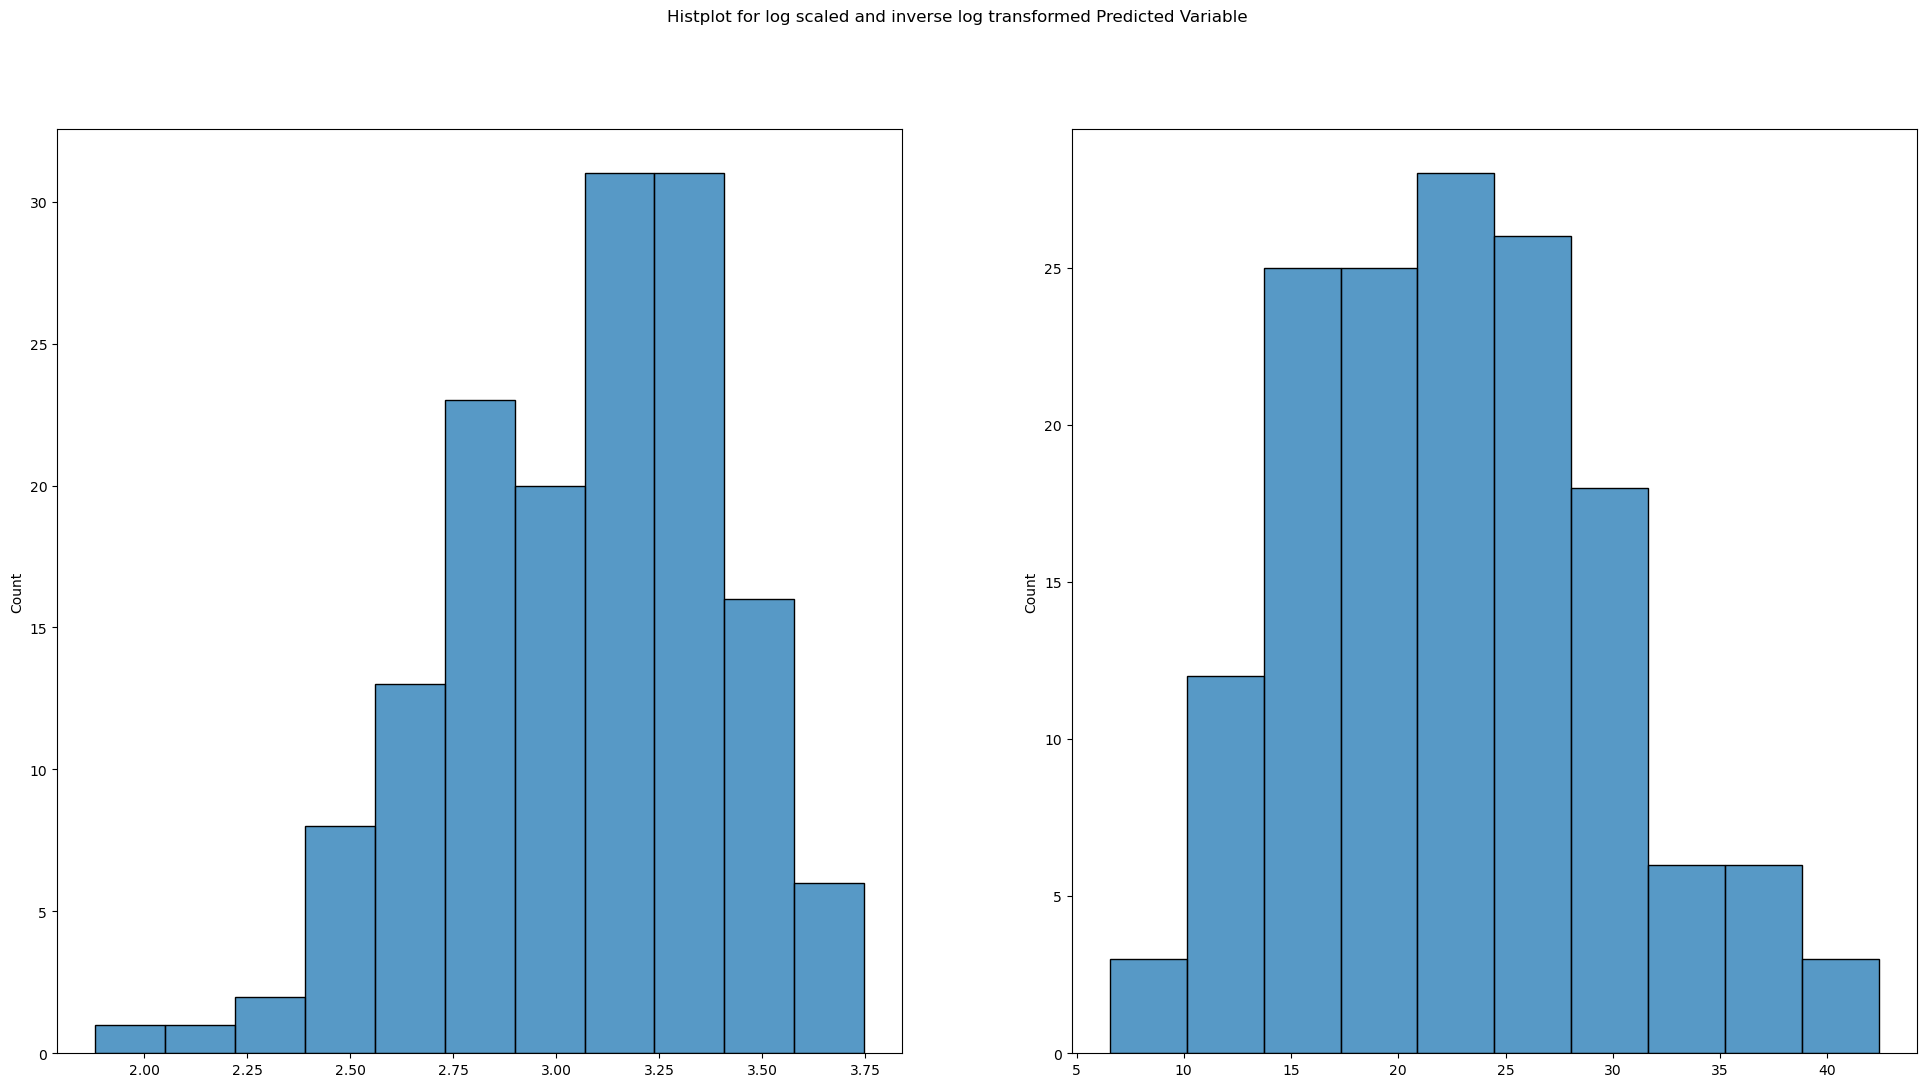

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (24, 12))

fig.suptitle('Histplot for log scaled and inverse log transformed Predicted Variable')

sns.histplot(Y_pred, ax = ax[0]);

sns.histplot(Y_pred_transformed, ax = ax[1]);

Text(0.5, 1.0, 'Prices vs Predicted Prices')

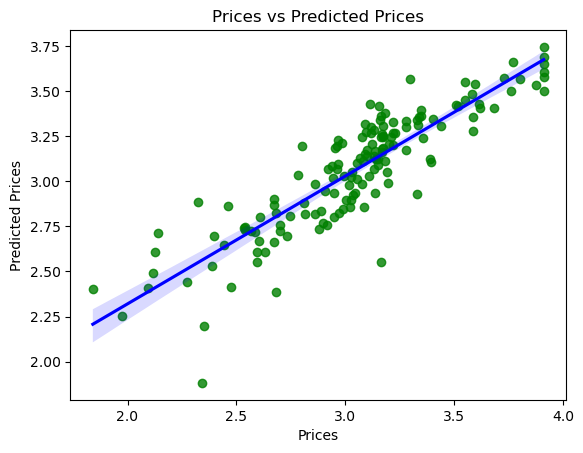

In [54]:
# create scatterplot of predicted vs real prices from test set with regression line 
sns.regplot(Y_test, Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 

plt.xlabel("Prices")

plt.ylabel("Predicted Prices")

plt.title("Prices vs Predicted Prices")

Text(0.5, 1.0, 'Predicted Prices vs Residuals')

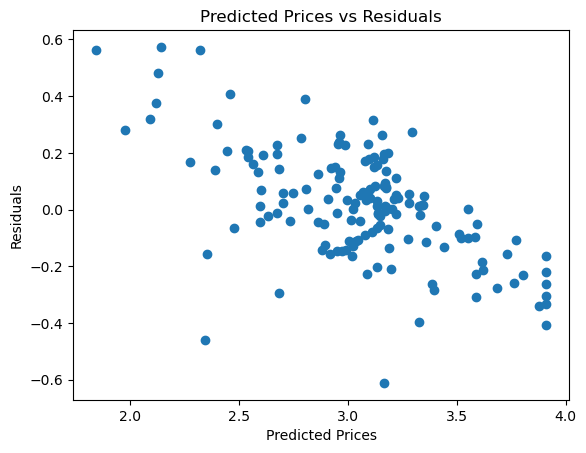

In [55]:
# create scatterplot of predicted prices vs residuals
plt.scatter(Y_test, Y_pred-Y_test) 

plt.xlabel("Predicted Prices")

plt.ylabel("Residuals")

plt.title("Predicted Prices vs Residuals")

## Actionable Insights and Recommendations 

- We performed EDA, univariate and bivariate analysis, on all the variables in the dataset.
- There was found interestingly high correlation between **RAD** and **TAX** variables. This needs more detailed analysis to understand the connection. 
- We implemented Log transformation of dependent variable as they were slightly skewed.
- We started the model building process.
- We removed multicollinearity from the data and analyzed the model summary report to drop insignificant features (**TAX**, **ZN**, **AGE**, and **INDUS**).
- We checked for different assumptions of linear regression and fixed the model iteratively if any assumptions did not hold true.
- Finally, we evaluated the model using different evaluation metrics and built predictions using test dataset.

The model equation is:



**MEDV_log = 4.6494 - 0.0125 $*CRIM$ + 0.1198 $*CHAS$ - 1.0562$*NOX$ + 0.0589$*RM$ - 0.0441$*DIS$ + 0.0078$*RAD$ - 0.0485$*PTRATIO$ - 0.0293$*LSTAT$**

From the equation, the prices increase when the houses are located close to Charles river and when number of rooms increases.


The most negative impact on prices is made by NOX values (oxide concentrations). Crime rates, proximity to Boston employement centers, pupil-teacher ratio by town, and %lower status of the population also negatively affect prices for houses.


___